In [0]:
# подгружаем необходимые библиотеки и фиксируем random state

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import re
import scipy
import collections
import matplotlib.pyplot as plt
# %matplotlib inline

RS=42

In [0]:
#подключаем гугл диск на котором данные
from google.colab import drive
drive.mount ('/content/gdrive', force_remount = True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#загружаем данные в датафреймы
bad_df=pd.read_csv('../content/gdrive/My Drive/dataset_sber_dj/bad.csv',sep=';')
bad_df.head(1_000_000)

FileNotFoundError: ignored

In [0]:
#загружаем данные в датафреймы
good_df=pd.read_csv('../content/gdrive/My Drive/dataset_sber_dj/good_half2.csv',sep=';',index_col='num')
good_df.head(1_000_000)

,id,original,type,country,town,field8,field9,fiel10,field11,field12,field13,field14,field15,field16
num,,,,,,,,,,,,,,
1,10000003,"115516, Москва, Бехтерева, 2, 1",house,РОССИЯ,МОСКВА,МОСКВА,NaN,NaN,NaN,Улица,БЕХТЕРЕВА,2,NaN,NaN
2,10000004,"117279, г. Москва, ул. Миклухо-Маклая, д.34, ...",house,РОССИЯ,МОСКВА,МОСКВА,NaN,NaN,NaN,Улица,МИКЛУХО-МАКЛАЯ,34,NaN,NaN
3,10000005,"127083, Москва, ул. Масловка В, 20, 1, 6",house,РОССИЯ,МОСКВА,МОСКВА,NaN,NaN,NaN,Улица,МАСЛОВКА В.,20,NaN,1
4,10000006,"Область Московская, Район Раменский",subregion,РОССИЯ,МОСКОВСКАЯ,NaN,NaN,Район,РАМЕНСКИЙ,NaN,NaN,NaN,NaN,NaN
5,10000007,"Область Московская, Район Сергиево-Посадский,...",city,РОССИЯ,МОСКОВСКАЯ,ХОТЬКОВО,NaN,Район,СЕРГИЕВО-ПОСАДСКИЙ,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683297,10683359,"Пресненский, г. Москва, Звенигородское шоссе 28с5",house,РОССИЯ,МОСКВА,МОСКВА,NaN,NaN,NaN,Шоссе,ЗВЕНИГОРОДСКОЕ,28,5,NaN
683298,10683360,"Пресненский, г. Москва, Звенигородское шоссе 28с6",house,РОССИЯ,МОСКВА,МОСКВА,NaN,NaN,NaN,Шоссе,ЗВЕНИГОРОДСКОЕ,28,6,NaN
683299,10683361,"Пресненский, г. Москва, Звенигородское шоссе 28с6",house,NaN,МОСКВА,МОСКВА,NaN,NaN,NaN,Шоссе,ЗВЕНИГОРОДСКОЕ,28,6,NaN


In [0]:
good_df.describe()

,id
count,6.833010e+05
mean,1.034169e+07
std,1.972676e+05
min,1.000000e+07
25%,1.017085e+07
50%,1.034170e+07
75%,1.051253e+07
max,1.068336e+07


In [0]:
good_df.fillna(value='0',inplace=True)
good_df.head(1_000_000)

,id,original,type,country,town,field8,field9,fiel10,field11,field12,field13,field14,field15,field16
num,,,,,,,,,,,,,,
1,10000003,"115516, Москва, Бехтерева, 2, 1",house,РОССИЯ,МОСКВА,МОСКВА,0,0,0,Улица,БЕХТЕРЕВА,2,0,0
2,10000004,"117279, г. Москва, ул. Миклухо-Маклая, д.34, ...",house,РОССИЯ,МОСКВА,МОСКВА,0,0,0,Улица,МИКЛУХО-МАКЛАЯ,34,0,0
3,10000005,"127083, Москва, ул. Масловка В, 20, 1, 6",house,РОССИЯ,МОСКВА,МОСКВА,0,0,0,Улица,МАСЛОВКА В.,20,0,1
4,10000006,"Область Московская, Район Раменский",subregion,РОССИЯ,МОСКОВСКАЯ,0,0,Район,РАМЕНСКИЙ,0,0,0,0,0
5,10000007,"Область Московская, Район Сергиево-Посадский,...",city,РОССИЯ,МОСКОВСКАЯ,ХОТЬКОВО,0,Район,СЕРГИЕВО-ПОСАДСКИЙ,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
683297,10683359,"Пресненский, г. Москва, Звенигородское шоссе 28с5",house,РОССИЯ,МОСКВА,МОСКВА,0,0,0,Шоссе,ЗВЕНИГОРОДСКОЕ,28,5,0
683298,10683360,"Пресненский, г. Москва, Звенигородское шоссе 28с6",house,РОССИЯ,МОСКВА,МОСКВА,0,0,0,Шоссе,ЗВЕНИГОРОДСКОЕ,28,6,0
683299,10683361,"Пресненский, г. Москва, Звенигородское шоссе 28с6",house,0,МОСКВА,МОСКВА,0,0,0,Шоссе,ЗВЕНИГОРОДСКОЕ,28,6,0


In [0]:
list_txt =[]  #список который будем токенизировать
f = open('../content/gdrive/My Drive/dataset_sber_dj/good_txt2.txt', 'r')

for line in f:
  list_txt.append(line)

print(list_txt[:10])


['num;txt2\n', '1; 115516, Москва, Бехтерева, 2, 1 house РОССИЯ МОСКВА МОСКВА 0 0 0 Улица БЕХТЕРЕВА 2 0 0\n', '2; 117279, г. Москва, ул. Миклухо-Маклая, д.34, оф.35 house РОССИЯ МОСКВА МОСКВА 0 0 0 Улица МИКЛУХО-МАКЛАЯ 34 0 0\n', '3; 127083, Москва, ул. Масловка В, 20, 1, 6 house РОССИЯ МОСКВА МОСКВА 0 0 0 Улица МАСЛОВКА В. 20 0 1\n', '4; Область Московская, Район Раменский subregion РОССИЯ МОСКОВСКАЯ 0 0 Район РАМЕНСКИЙ 0 0 0 0 0\n', '5; Область Московская, Район Сергиево-Посадский, Город Хотьково city РОССИЯ МОСКОВСКАЯ ХОТЬКОВО 0 Район СЕРГИЕВО-ПОСАДСКИЙ 0 0 0 0 0\n', '6; г.Москва,-,ул.Ляпидевского, вл.1 street РОССИЯ МОСКВА МОСКВА 0 0 0 Улица ЛЯПИДЕВСКОГО 0 0 0\n', '7;"108841, г. Москва, г. Троицк, м-н ""В"", 54, 74 house РОССИЯ МОСКВА ТРОИЦК 0 0 0 Микрорайон В 54 0 0"\n', '8;"109145, Москва, Привольная, 2, 1, ПОМЕЩЕНИЕ 3;house;РОССИЯ;МОСКВА;МОСКВА;;;;Улица;ПРИВОЛЬНАЯ;2;;1;;3\n', '10000011;123060 Москва г, Маршала Рыбалко ул, 2 6 3 house РОССИЯ МОСКВА МОСКВА 0 0 0 Улица МАРШАЛА РЫБА

In [0]:
TOKEN_RE = re.compile(r'[\w\d]+')  #regular expression to start with

In [0]:
def tokenize_text_simple_regex(txt, min_token_size=2):
    """ This func tokenize text with TOKEN_RE applied ealier """
    txt = txt.lower()
    all_tokens = TOKEN_RE.findall(txt)
    return [token for token in all_tokens if len(token) >= min_token_size]

def tokenize_corpus(texts, tokenizer=tokenize_text_simple_regex, **tokenizer_kwargs):
    """
    This func tokenize corpus of docs
    """
    return [tokenizer(text, **tokenizer_kwargs) for text in texts]

In [0]:
text_tokenized = tokenize_corpus(list_txt)

print(text_tokenized[:10])

[['num', 'txt2'], ['115516', 'москва', 'бехтерева', 'house', 'россия', 'москва', 'москва', 'улица', 'бехтерева'], ['117279', 'москва', 'ул', 'миклухо', 'маклая', '34', 'оф', '35', 'house', 'россия', 'москва', 'москва', 'улица', 'миклухо', 'маклая', '34'], ['127083', 'москва', 'ул', 'масловка', '20', 'house', 'россия', 'москва', 'москва', 'улица', 'масловка', '20'], ['область', 'московская', 'район', 'раменский', 'subregion', 'россия', 'московская', 'район', 'раменский'], ['область', 'московская', 'район', 'сергиево', 'посадский', 'город', 'хотьково', 'city', 'россия', 'московская', 'хотьково', 'район', 'сергиево', 'посадский'], ['москва', 'ул', 'ляпидевского', 'вл', 'street', 'россия', 'москва', 'москва', 'улица', 'ляпидевского'], ['108841', 'москва', 'троицк', '54', '74', 'house', 'россия', 'москва', 'троицк', 'микрорайон', '54'], ['109145', 'москва', 'привольная', 'помещение', 'house', 'россия', 'москва', 'москва', 'улица', 'привольная'], ['10000011', '123060', 'москва', 'маршала', '

In [0]:
def build_vocabulary(tokenized_texts, max_size=100_000, max_doc_freq=1.0, min_count=1, pad_word=None):
    """ This func builds vocabulary """
    word_counts = collections.defaultdict(int)
    doc_n = 0

    # посчитать количество документов, в которых употребляется каждое слово
    # а также общее количество документов
    for txt in tokenized_texts:
        doc_n += 1
        unique_text_tokens = set(txt)
        for token in unique_text_tokens:
            word_counts[token] += 1

    # убрать слишком редкие и слишком частые слова
    word_counts = {word: cnt for word, cnt in word_counts.items()
                   if cnt >= min_count and cnt / doc_n <= max_doc_freq}

    # отсортировать слова по убыванию частоты
    sorted_word_counts = sorted(word_counts.items(),
                                reverse=True,
                                key=lambda pair: pair[1])

    # добавим несуществующее слово с индексом 0 для удобства пакетной обработки
    if pad_word is not None:
        sorted_word_counts = [(pad_word, 0)] + sorted_word_counts

    # если у нас по прежнему слишком много слов, оставить только max_size самых частотных
    if len(word_counts) > max_size:
        sorted_word_counts = sorted_word_counts[:max_size]

    # нумеруем слова
    word2id = {word: i for i, (word, _) in enumerate(sorted_word_counts)}

    # нормируем частоты слов
    word2freq = np.array([cnt / doc_n for _, cnt in sorted_word_counts], dtype='float32')

    return word2id, word2freq

In [0]:
vocabulary, word_doc_freq = build_vocabulary(text_tokenized, max_doc_freq=1.0, min_count=2)
print("Размер словаря", len(vocabulary))
print(list(vocabulary.items())[:20])

Размер словаря 22571
[('house', 0), ('москва', 1), ('улица', 2), ('россия', 3), ('московская', 4), ('область', 5), ('ул', 6), ('район', 7), ('дом', 8), ('street', 9), ('переулок', 10), ('проезд', 11), ('шоссе', 12), ('проспект', 13), ('пер', 14), ('пр', 15), ('город', 16), ('кт', 17), ('10', 18), ('бульвар', 19)]


In [0]:
def plot_vectors(x, y, labels):

    ax.scatter(x, y)
    for cur_x, cur_y, cur_label in zip(x, y, labels):
        ax.annotate(cur_label, (cur_x, cur_y))

[0.8567006  0.66614443 0.58643275 0.54707    0.34015355 0.3247404
 0.2764957  0.1292949  0.1292949  0.11806519 0.0817007  0.07558206
 0.07222685 0.06816896 0.05089236 0.04854305 0.04017784 0.03449614
 0.02818839 0.0281835 ]
[5, 6, 5, 6, 10, 7, 2, 5, 3, 6, 8, 6, 5, 8, 3, 2, 5, 2, 2, 7]


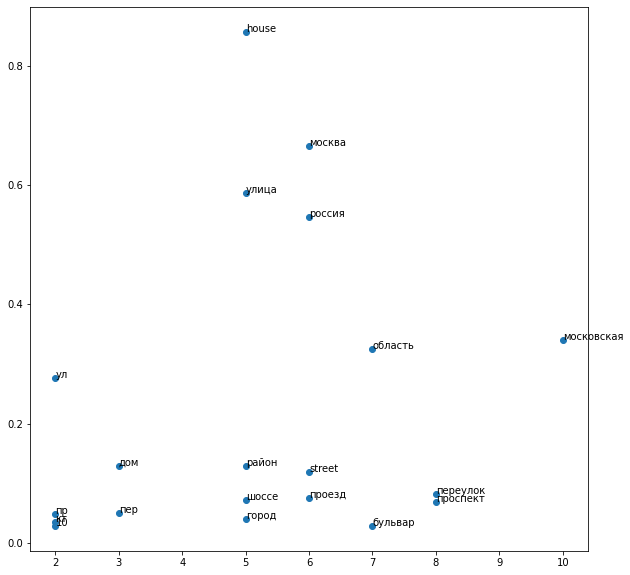

In [0]:
test_words = ['house', 'москва', 'улица', 'россия', 'московская', 'область', 'ул', 'район', 'дом', 'street', 'переулок', 'проезд', 'шоссе', \
              'проспект', 'пер', 'пр', 'город', 'кт', '10', 'бульвар']
test_vectors = word_doc_freq[:20]
print(test_vectors)
#let s build list with len of words
len_list = []
for i in test_words:
  len_list.append(len(i))
print(len_list)

fig, ax = plt.subplots()
fig.set_size_inches((10, 10))
plot_vectors(len_list, test_vectors, test_words)

In [0]:
X=good_df.original
X.head()

num
1                      115516, Москва, Бехтерева, 2, 1
2     117279, г. Москва, ул. Миклухо-Маклая, д.34, ...
3             127083, Москва, ул. Масловка В, 20, 1, 6
4                  Область Московская, Район Раменский
5     Область Московская, Район Сергиево-Посадский,...
Name: original, dtype: object

In [0]:
list_X=list(X)

In [0]:
print(list_X[:10])

[' 115516, Москва, Бехтерева, 2, 1', ' 117279, г. Москва, ул. Миклухо-Маклая, д.34, оф.35', ' 127083, Москва, ул. Масловка В, 20, 1, 6', ' Область Московская, Район Раменский', ' Область Московская, Район Сергиево-Посадский, Город Хотьково', ' г.Москва,-,ул.Ляпидевского, вл.1', '108841, г. Москва, г. Троицк, м-н "В", 54, 74', '109145, Москва, Привольная, 2, 1, ПОМЕЩЕНИЕ 3;house;РОССИЯ;МОСКВА;МОСКВА;;;;Улица;ПРИВОЛЬНАЯ;2;;1;;3\n10000011;123060 Москва г, Маршала Рыбалко ул, 2 6 3', '125167 Москва г, Ленинградский пр-кт, 36 СТР.15, ПОМЕЩЕНИЕ 1;house;РОССИЯ;МОСКВА;МОСКВА;;;;Проспект;ЛЕНИНГРАДСКИЙ;36;15;;;1\n10000013;127238, г Москва, Северный административный округ, район Тимирязевский, пр Линейный, д 6 ""А"", кв 25"', '140700, Московская область, г.Шатура, Шатурский р-он, ул. Моховая, дом 30"А"']


In [0]:
X_tokenized = tokenize_corpus(list_X)

print(X_tokenized[:10])

[['115516', 'москва', 'бехтерева'], ['117279', 'москва', 'ул', 'миклухо', 'маклая', '34', 'оф', '35'], ['127083', 'москва', 'ул', 'масловка', '20'], ['область', 'московская', 'район', 'раменский'], ['область', 'московская', 'район', 'сергиево', 'посадский', 'город', 'хотьково'], ['москва', 'ул', 'ляпидевского', 'вл'], ['108841', 'москва', 'троицк', '54', '74'], ['109145', 'москва', 'привольная', 'помещение', 'house', 'россия', 'москва', 'москва', 'улица', 'привольная', '10000011', '123060', 'москва', 'маршала', 'рыбалко', 'ул'], ['125167', 'москва', 'ленинградский', 'пр', 'кт', '36', 'стр', '15', 'помещение', 'house', 'россия', 'москва', 'москва', 'проспект', 'ленинградский', '36', '15', '10000013', '127238', 'москва', 'северный', 'административный', 'округ', 'район', 'тимирязевский', 'пр', 'линейный', 'кв', '25'], ['140700', 'московская', 'область', 'шатура', 'шатурский', 'он', 'ул', 'моховая', 'дом', '30']]


In [0]:
def vectorize_texts(tokenized_texts, word2id, word2freq, mode='tfidf', scale=True):
    """ This func vectorize texts """
    assert mode in {'ltfidf', 'tfidf', 'idf', 'tf', 'bin'}
    # ltfidf is ln(TF+1)*IDF
    # считаем количество употреблений каждого слова в каждом документе
    result = scipy.sparse.dok_matrix((len(tokenized_texts), len(word2id)), dtype='float32')
    for text_i, text in enumerate(tokenized_texts):
        for token in text:
            if token in word2id:
                result[text_i, word2id[token]] += 1  #add 1 to element of matrix

    # получаем бинарные вектора "встречается или нет"
    if mode == 'bin':
        result = (result > 0).astype('float32')

    # получаем вектора относительных частот слова в документе
    elif mode == 'tf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))
    # учитываем всю информацию, которая у нас есть:
    # частоту слова в документе и частоту слова в корпусе
    elif mode == 'tfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sum(1))  # разделить каждую строку на её длину
        result = result.multiply(1 / word2freq)  # разделить каждый столбец на вес слова
    elif mode == 'ltfidf':
        result = result.tocsr()
        result = result.multiply(1 / result.sim(1))  # divide string to its len
        one_array = np.ones(len(tokenized_texts), len(word2id))
        result = np.log(result + one_array)
        result = result.multiply( 1 / word2freq)

    if scale:
        #result = result.tocsc()
        #result = result.std(0, ddof = 1)
        result = result.tocsr()
        result -= result.min()
        result /= (result.max() + 1e-6)

    return result.tocsr()


In [0]:
VECTORIZATION_MODE = 'tfidf'
train_vectors = vectorize_texts(X_tokenized, vocabulary, word_doc_freq, mode=VECTORIZATION_MODE)

print('Размерность матрицы признаков обучающей выборки', train_vectors.shape)
print()
print('Количество ненулевых элементов в обучающей выборке', train_vectors.nnz)
print('Процент заполненности матрицы признаков {:.2f}%'.format(train_vectors.nnz * 100 / (train_vectors.shape[0] * train_vectors.shape[1])))
print()

AttributeError: ignored

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split



In [0]:
sklearn_pipeline = Pipeline((('vect', TfidfVectorizer(tokenizer=tokenize_text_simple_regex,
                                                      max_df=0.8,
                                                      min_df=5)),
                             ('cls', GradientBoostingClassifier(random_state=RS))))

In [0]:
sklearn_pipeline.fit(good_df['original'], good_df['type']);

In [0]:
sklearn_train_pred = sklearn_pipeline.predict_proba(good_df['original'])

In [0]:
print(sklearn_train_pred[:10])

[[1.42266541e-02 8.92061653e-01 7.79584370e-09 9.35437342e-02
  1.67950972e-04]
 [9.74033486e-03 8.94635450e-01 7.55904829e-09 9.54613585e-02
  1.62849534e-04]
 [2.60781190e-03 9.63722992e-01 3.13010267e-09 3.36017587e-02
  6.74338540e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  1.00000000e+00]
 [6.33094723e-01 2.35689756e-01 7.40893150e-09 1.31055898e-01
  1.59615469e-04]
 [3.84440897e-03 1.00375345e-01 4.61436454e-09 8.95680832e-01
  9.94102808e-05]
 [1.54713098e-02 8.82618387e-01 8.47788327e-09 1.01727650e-01
  1.82644598e-04]
 [4.49012815e-03 9.15132610e-01 9.70267169e-09 8.01682213e-02
  2.09031018e-04]
 [4.48339370e-03 9.74780522e-01 2.70384203e-09 2.06778308e-02
  5.82506417e-05]
 [4.47938954e-03 9.78604026e-01 2.46304905e-09 1.68635189e-02
  5.30630806e-05]]


In [0]:
import pickle

In [0]:
# save the model to disk
filename = 'model_dj01.sav'
pickle.dump(sklearn_pipeline, open(filename, 'wb'))

# some time later...

# load the model from disk
#loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)

In [0]:
!ls

gdrive	model_dj01.sav	sample_data


In [0]:
from google.colab import files
files.download('model_dj01.sav')